In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.animation as animation

# Double Pendulum
The Lagrangian for the double pendulum is: $\frac{1}{2}(m_{1}+m_{2})l^{2}_{1}\dot{\theta^{2}_1}+\frac{1}{2}m_{2}l^{2}_{2}\dot{\theta^2_{2}}+m_{2}l_{1}l_{2}\dot{\theta_{1}}\dot{\theta_2}cos(\theta_1-\theta_2)$
I implemented the euler-lagrange equations in mathematica and had it solve for $\ddot{\phi_1}$ and $\ddot{\phi_2}$. 

In [2]:
class doublependulum():
    def __init__(self,L1,L2,m1,m2,g):
        """
        L1: float 
            = length of pendulum 1
        L2:float
            = length of pendulum 2
        m1:float
            = mass of pendulum 1
        m2:float
            = mass of pendulum 2
        g:float
            = gravitational acceleration
        """
        self.L1=L1
        self.L2=L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        
    def dy_dt(self,t,y):
        """
        p1:float
            =angle of pendulum 1 with respect to the vertical
        p2:float
            =angle of pendulum 2 with repsect to the vertical
        
        Parameters
        ----------
        t : float
            time 
        y : float
            y[0]=p1,y[1]=p1dot,y[2]=p2,y[3]=p2dot
            
        Returns
        -------
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        
        """
        L1=self.L1
        L2=self.L2
        g=self.g
        m1=self.m1
        m2=self.m2
        
        p1,p1dot,p2,p2dot = y
        s,c = np.sin(p1-p2), np.cos(p1-p2)
        
        denom = self.m1+self.m2*s**2.0

        p1ddot=-((g*m1*np.sin(p1)+g*m2*np.sin(p1)-g*m2*c*np.sin(p2)+L1*m2*c*s*p1dot**2+L2*m2*s*p2dot**2)/(L1*denom))
        
        p2ddot=(g*m1*c*np.sin(p1)+g*m2*c*np.sin(p1)-g*m1*np.sin(p2)-g*m2*np.sin(p2)+L1*m1*s*p1dot**2+L1*m2*s*p1dot**2+L2*m2*c*s*p2dot**2)/(L2*denom)
        

        return p1dot,p1ddot,p2dot,p2ddot
                                                                                            
    def solve_ode(self, t_pts, p1_0, p1dot_0, p2_0, p2dot_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [p1_0, p1dot_0, p2_0, p2dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        p1, p1dot, p2, p2dot = solution.y

        return p1, p1dot, p2, p2dot
        

In [3]:
L1=1.0
L2=1.0
m1=1.0
m2=1.0
g=1.0
pend1 = doublependulum(L1,L2,m1,m2,g)

t_start = 0.
t_end = 200.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  


p1_0 = np.pi/2
p1dot_0 = 0
p2_0 = 0
p2dot_0 = 0
phi_1, phi_dot_1, phi_2, phi_dot2 = pend1.solve_ode(t_pts,p1_0,p1dot_0,p2_0,p2dot_0)
phi_1d, phi_dot_1d, phi_2d, phi_dot2d = pend1.solve_ode(t_pts,p1_0+.00001,p1dot_0,p2_0,p2dot_0)

Delta = np.abs(phi_1d-phi_1)
Delta2 = np.abs(phi_2d-phi_2)

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                points=False, ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        if not points:
            line, = ax.plot(x, y, label=label, 
                            color=color, linestyle=linestyle)
        else:
            line = ax.scatter(x, y, label=label,
                              color=color, marker='^')

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

(<matplotlib.axes._subplots.AxesSubplot at 0x1e89d85fc18>,
 <matplotlib.lines.Line2D at 0x1e89dafe8d0>)

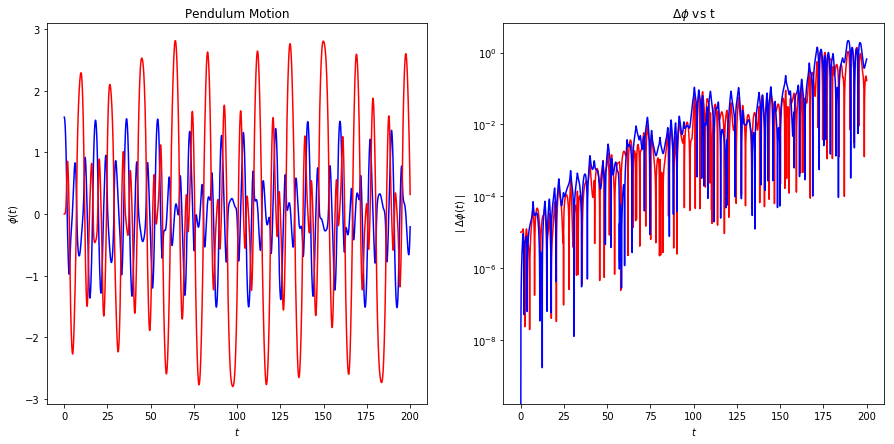

In [6]:
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
delta_vs_time_labels = (r'$t$', r'$\mid{\Delta{\phi(t)}}\mid$')
start, stop = start_stop_indices(t_pts, 0., t_end) 

fig = plt.figure(figsize=(15, 7), num='Pendulum animation')
ax_1 = fig.add_subplot(1,2,1)  
ax_2 = fig.add_subplot(1,2,2)
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_1) 
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None,
            title='Pendulum Motion',
            ax=ax_1) 
plot_y_vs_x(t_pts[start : stop], Delta[start : stop], 
            axis_labels=delta_vs_time_labels, 
            color='red',
            label=None,
            semilogy=True,
            title='$\Delta\phi$ vs t',
            ax=ax_2) 
plot_y_vs_x(t_pts[start : stop], Delta2[start : stop], 
            axis_labels=delta_vs_time_labels, 
            color='blue',
            label=None,
            semilogy=True,
            ax=ax_2) 

# Triple Pendulum
The Lagrangian for the triple pendulum is $\frac{1}{2} \left(2 g (\text{L1} (\text{m1}+\text{m2}+\text{m3}) \cos (\text{p1}(t))-\text{L1} (\text{m1}+\text{m2}+\text{m3})-\text{m3} (\text{L2}+\text{L3})+\text{L2} (\text{m2}+\text{m3}) \cos (\text{p2}(t))-\text{L2} \text{m2}+\text{L3} \text{m3} \cos (\text{p3}(t)))+\text{L1}^2 (\text{m1}+\text{m2}+\text{m3}) \text{p1}'(t)^2+2 \text{L1} \text{p1}'(t) \left(\text{L2} (\text{m2}+\text{m3}) \text{p2}'(t) \cos (\text{p1}(t)-\text{p2}(t))+\text{L3} \text{m3} \text{p3}'(t) \cos (\text{p1}(t)-\text{p3}(t))\right)+\text{L2}^2 (\text{m2}+\text{m3}) \text{p2}'(t)^2+2 \text{L2} \text{L3} \text{m3} \text{p2}'(t) \text{p3}'(t) \cos (\text{p2}(t)-\text{p3}(t))+\text{L3}^2 \text{m3} \text{p3}'(t)^2\right)$

In [7]:
class triplependulum():
    def __init__(self,L1,L2,L3,m1,m2,m3,g):
        """
        L1 = length of pendulum 1
        L2 = length of pendulum 2
        L3 = length of pendulum 3
        m1 = mass of pendulum 1
        m2 = mass of pendulum 2
        m3 - mass of pendulum 3
        g = gravitational acceleration
        """
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.g = g
        
    def dy_dt(self,t,y):
        """
        p1:float
            =angle of pendulum 1 with respect to the vertical
        p2:float
            =angle of pendulum 2 with repsect to the vertical
        p3:float
            =angle of pendulum 3 with repsect to the vertical
        
        Parameters
        ----------
        t : float
            time 
        y : float
            y[0]=p1,y[1]=p1dot,y[2]=p2,y[3]=p2dot,y[4]=p3,y[5]=p3dot
            
        Returns
        -------
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2 dphi3/dt d^2phi3/dt^2]
        """
        L1=self.L1
        L2=self.L2
        L3=self.L3
        g=self.g
        m1=self.m1
        m2=self.m2
        m3=self.m3
        
        p1,p1dot,p2,p2dot,p3,p3dot = y
        
        p1ddot = -((g*(m2*(m2+m3)+m1*(2*m2+m3)-m1*m3*np.cos(2*(p2-p3)))\
                    *np.sin(p1)+g*m2*(m2+m3)*np.sin(p1-2*p2)+2*m2*np.sin(p1-p2)\
                    *((m2+m3)*(L1*np.cos(p1-p2)*p1dot**2+L2*p2dot**2)+L3*m3\
                      *np.cos(p2-p3)*p3dot**2))/(L1*(m2*(2*m1+m2)+(m1+m2)\
                        *m3-m2*(m2+m3)*np.cos(2*(p1-p2))-m1*m3*np.cos(2*(p2-p3)))))
        
        p2ddot = (g*np.cos(p1)*((2*m2*(m1+m2)+(m1+2*m2)*m3)*np.sin(p1-p2)\
                 -m1*m3*np.sin(p1+p2-2*p3))+L1*((2*m2*(m1+m2)+(m1+2*m2)*m3)\
                 *np.sin(p1-p2)-m1*m3*np.sin(p1+p2-2*p3))*p1dot**2+L2*(m2*(m2+m3)\
                *np.sin(2*(p1-p2))-m1*m3*np.sin(2*(p2-p3)))*p2dot**2+2*L3*m3*(m2*np.cos(p1-p3)\
                *np.sin(p1-p2)-m1*np.sin(p2-p3))*p3dot**2)/(L2*(m2*(2*m1+m2)+(m1+m2)*m3-m2*(m2+m3)\
                *np.cos(2*(p1-p2))-m1*m3*np.cos(2*(p2-p3))))
                   
        p3ddot = 2*m1*np.sin(p2-p3)*((m2+m3)*(np.cos(p1-p2)*(g*np.cos(p1)+L1*p1dot**2)+L2*p2dot**2)\
                 +L3*m3*np.cos(p2-p3)*p3dot**2)/(L3*(m2*(2*m1+m2)+(m1+m2)*m3-m2*(m2+m3)\
                 *np.cos(2*(p1-p2))-m1*m3*np.cos(2*(p2-p3))))

        

        return p1dot,p1ddot,p2dot,p2ddot,p3dot,p3ddot
                                                                                            
    def solve_ode(self, t_pts, p1_0, p1dot_0, p2_0, p2dot_0, p3, p3dot_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [p1_0, p1dot_0, p2_0, p2dot_0, p3_0, p3dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        p1, p1dot, p2, p2dot, p3, p3dot = solution.y

        return p1, p1dot, p2, p2dot, p3, p3dot



In [8]:
#properties of triple pendulum
L1=1.0
L2=1.0
L3=1.0
m1=1.0
m2=1.0
m3=1.0
g=1.0
triple1 = triplependulum(L1,L2,L3,m1,m2,m3,g)

#time point array
t_start = 0.
t_end = 200.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#triple pendulum inital conditions
p1_0 = np.pi/2
p1dot_0 = 0
p2_0 = 0
p2dot_0 = 0
p3_0 = 0
p3dot_0 = 0

#adds to p1_0 in order to create a slight difference in initial conditions to show chaos
chaos_delta =.00001

phi_1, phi_dot1, phi_2, phi_dot2, phi_3, phi_dot3 \
    = triple1.solve_ode(t_pts,p1_0,p1dot_0,p2_0,p2dot_0,p3_0,p3dot_0)

phi_1d, phi_dot_1d, phi_2d, phi_dot2d, phi_3d, phi_dot3d \
    = triple1.solve_ode(t_pts,p1_0+chaos_delta,p1dot_0,p2_0,p2dot_0,p3_0,p3dot_0)

#check array size for debugging
print(t_pts.shape,phi_1.shape)

#calculate the difference between angles with similar inital conditions
Delta = np.abs(phi_1d-phi_1)
Delta2 = np.abs(phi_2d-phi_2)
Delta3 = np.abs(phi_3d-phi_3)

(20001,) (20001,)


(<matplotlib.axes._subplots.AxesSubplot at 0x1e89de97828>,
 <matplotlib.lines.Line2D at 0x1e89eebebe0>)

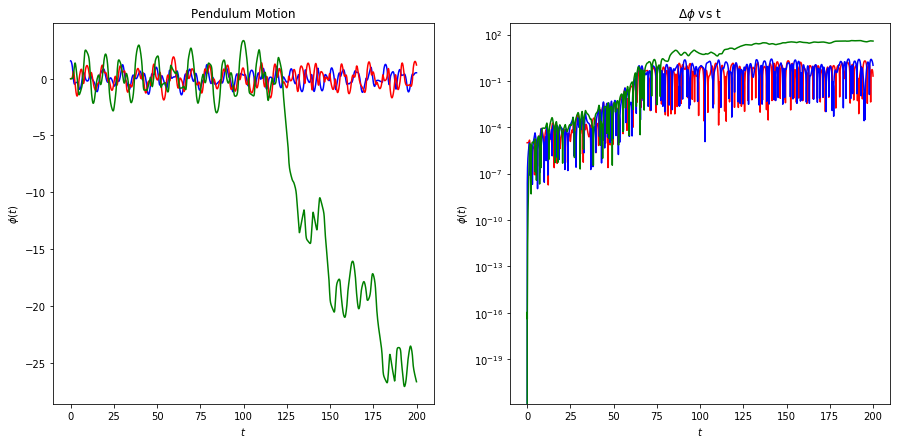

In [9]:
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
start, stop = start_stop_indices(t_pts, 0., t_end) 

fig = plt.figure(figsize=(15, 7), num='Triple Pendulum')
ax_1 = fig.add_subplot(1,2,1)  
ax_2 = fig.add_subplot(1,2,2)


plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title = 'Pendulum Motion',
            ax=ax_1) 
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            ax=ax_1) 
plot_y_vs_x(t_pts[start : stop], phi_3[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='green',
            label=None,
            ax=ax_1) 
plot_y_vs_x(t_pts[start : stop], Delta[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None,
            semilogy=True,
            title='$\Delta\phi$ vs t',
            ax=ax_2) 
plot_y_vs_x(t_pts[start : stop], Delta2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None,
            semilogy=True,
            ax=ax_2) 
plot_y_vs_x(t_pts[start : stop], Delta3[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='green',
            label=None,
            semilogy=True,
            ax=ax_2) 

Animation for the triple pendulum:

<IPython.core.display.Javascript object>


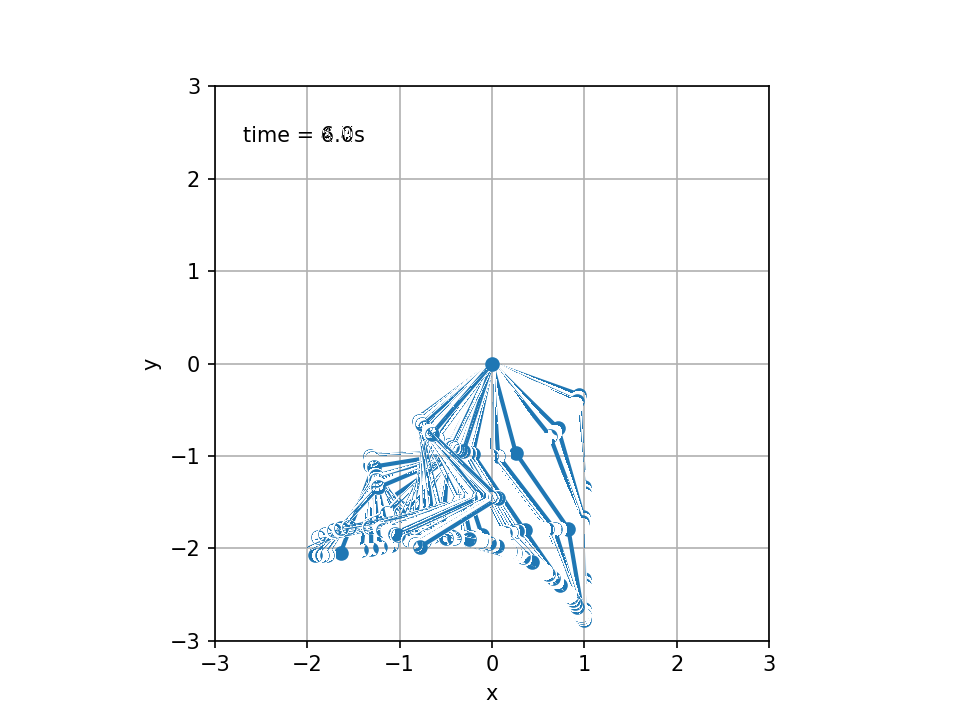

In [10]:
%matplotlib nbagg
x1 = L1*np.sin(phi_1)
y1 = -L1*np.cos(phi_1)

x2 = L2*np.sin(phi_2) + x1
y2 = -L2*np.cos(phi_2) + y1

x3=L3*np.sin(phi_3)+x2
y3=-L3*np.cos(phi_3)+y2

fig2 = plt.figure()
ax3 = fig2.add_subplot(111, autoscale_on=False, xlim=(-3, 3), ylim=(-3, 3))
ax3.set_aspect('equal')
ax3.grid()
plt.xlabel('x')
plt.ylabel('y')

line, = ax3.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax3.text(0.05, 0.9, '', transform=ax3.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i], x3[i]]
    thisy = [0, y1[i], y2[i], y3[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*delta_t))
    return line, time_text

ani = animation.FuncAnimation(fig2, animate, np.arange(0, 4*len(phi_1)),
                              interval=3, blit=True, init_func=init)

plt.show()
